In [1]:
import pandas as pd
df = pd.read_csv('../data/us_congressional_record/us_congress_speeches_processed.csv', nrows = 1000)
df.dropna(subset=['doc_clean'], inplace=True)
df['word_count'] = df['doc_clean'].apply(lambda x: len(x.split()))
df = df[df["word_count"] > 30]

import sys
sys.path.append('../gtm/')

from corpus import GTMCorpus
train_dataset = GTMCorpus(
    df, 
    prevalence = "~ party", 
    content = "~ party",
    vectorizer_args={'ngram_range':(1, 1), 'max_df':0.99, 'min_df':0.01}
)

from optimizer import GTMOptimizer
opt = GTMOptimizer(n_topics = [10,20,30], n_samples = 1)
opt.optimize(train_dataset)

/home/germain/Documents/topic models/generalized_topic_model_dev/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



Early stopping at Epoch 6. Reverting to Epoch 5

Early stopping at Epoch 5. Reverting to Epoch 4

Early stopping at Epoch 4. Reverting to Epoch 3


In [2]:
opt.grid

,n_topics,doc_topic_prior,alpha,encoder_input,encoder_hidden_layer,encoder_non_linear_activation,encoder_bias,decoder_hidden_layer,decoder_non_linear_activation,decoder_bias,predictor_hidden_layer,predictor_non_linear_activation,seed,config_id,diversity,c_npmi,c_v,c_uci,umass
0,10,logistic_normal,0.1,bow,"[1024, 512]",relu,True,"[1024, 512]",relu,True,[],relu,0,1,0.210000,-0.647120,0.367597,-0.033092,-0.647120
1,20,logistic_normal,0.1,bow,"[1024, 512]",relu,True,"[1024, 512]",relu,True,[],relu,0,2,0.060000,-0.581278,0.349626,-0.088922,-0.581278
2,30,logistic_normal,0.1,bow,"[1024, 512]",relu,True,"[1024, 512]",relu,True,[],relu,0,3,0.036667,-0.577875,0.351310,-0.086387,-0.577875


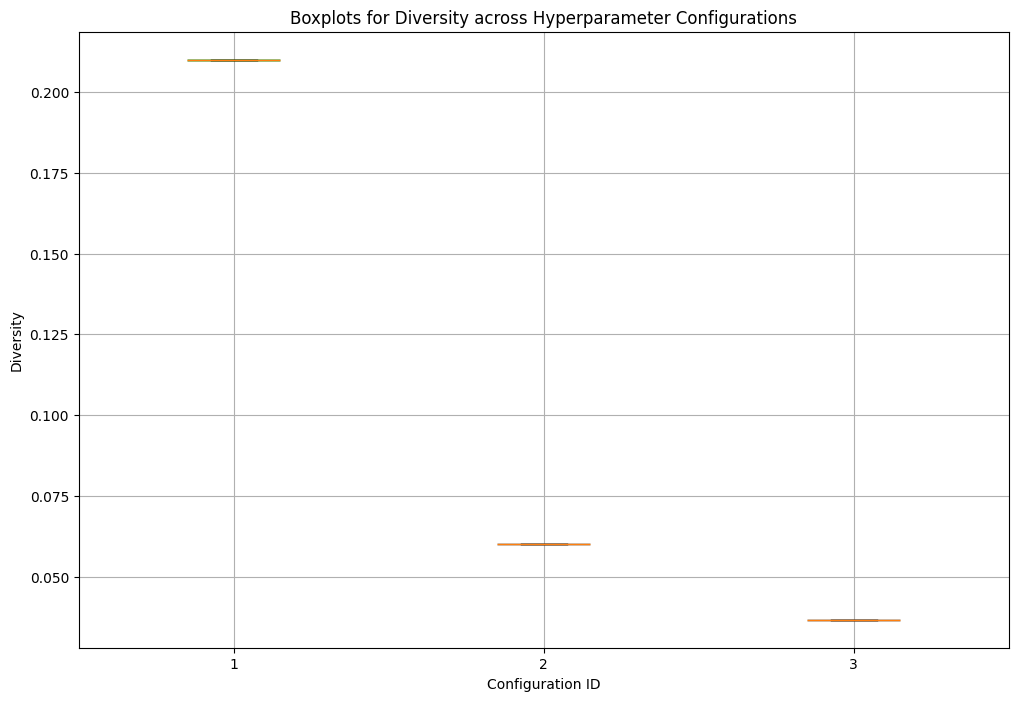

In [3]:
opt.plot_evaluation_metric(metric = "diversity")

In [4]:
best_model_params, gtm = opt.get_best_model(metric = 'c_uci')

In [5]:
best_model_params

{'n_topics': 10,
 'doc_topic_prior': 'logistic_normal',
 'alpha': 0.1,
 'encoder_input': 'bow',
 'encoder_hidden_layer': [1024, 512],
 'encoder_non_linear_activation': 'relu',
 'encoder_bias': True,
 'decoder_hidden_layer': [1024, 512],
 'decoder_non_linear_activation': 'relu',
 'decoder_bias': True,
 'predictor_hidden_layer': [],
 'predictor_non_linear_activation': 'relu',
 'seed': 0,
 'config_id': 1,
 'diversity': 0.21,
 'c_npmi': -0.6471196650948662,
 'c_v': 0.36759712245923637,
 'c_uci': -0.033091840403056905,
 'umass': -0.6471196650948662}